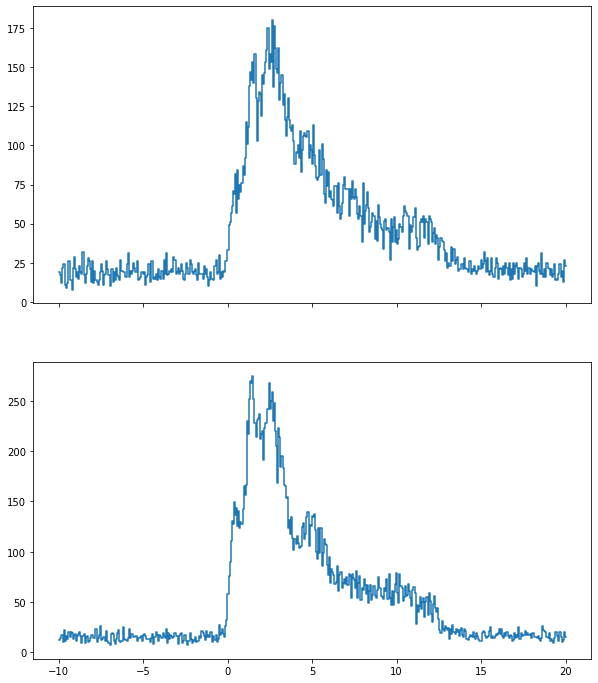

In [2]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from astropy.io import fits

bn = '150314205'
det = 'n9'
binwidth = 0.064
viewt1 = -10
viewt2 = 20


databasedir = '/home/lang/Work/myccf/data/'
year = '20'+bn[0:2]
datadir = databasedir+'/'+year+'/bn'+bn
ttefile = glob(datadir+'/'+'glg_tte_'+det+'_bn'+bn+'_v*.fit')
assert len(ttefile) == 1
hdu = fits.open(ttefile[0])
trigtime = hdu['Primary'].header['TRIGTIME']
data = hdu['EVENTS'].data
time = data.field(0)-trigtime
ch = data.field(1)

time1 =  time[(ch >= 20) & (ch <= 40)]
time2 =  time[(ch >= 40) & (ch <= 80)]
tbins = np.arange(viewt1,viewt2+binwidth,binwidth)
counts1, _ = np.histogram(time1,bins=tbins)
counts2, _ = np.histogram(time2,bins=tbins)
counts_forplot1 = np.concatenate(([counts1[0]],counts1))
counts_forplot2 = np.concatenate(([counts2[0]],counts2))

fig, axes = plt.subplots(2,1,figsize=(10, 12),sharex=True,sharey=False)
axes[0].plot(tbins,counts_forplot1,drawstyle='steps')
axes[1].plot(tbins,counts_forplot2,drawstyle='steps')
#plt.savefig('./lc.png')
plt.show()
plt.close()

In [3]:
r, r_p_value = stats.pearsonr(counts1, counts2); print(r, r_p_value)
rho, rho_p_value = stats.spearmanr(counts1, counts2); print(rho, rho_p_value)
tau, tau_p_value = stats.kendalltau(counts1, counts2); print(tau, tau_p_value)

0.9552520130876286 3.453785968096523e-249
0.8310278839876554 4.7984927529075e-121
0.6636877792522149 4.3355749984866485e-98


In [4]:
def plot_ccf(counts1, counts2):
    assert len(counts1) == len(counts2)
    N_halfwindow = round(len(counts1)*0.25)
    i_Center =  round(len(counts1)*0.5)
    ccf = np.array([
        [j,*stats.pearsonr(counts1[i_Center-N_halfwindow:i_Center+N_halfwindow], 
                         counts2[i_Center-N_halfwindow+j:i_Center+N_halfwindow+j])] 
                                     for j in np.arange(-N_halfwindow,N_halfwindow)
    ])
    return ccf
z = plot_ccf(counts1, counts2)
x = z[:,0]
y = z[:,1]
p = z[:,2]
x_max = x[np.argmax(y)]
print('lag =',x_max*binwidth,'s')

lag = -0.128 s


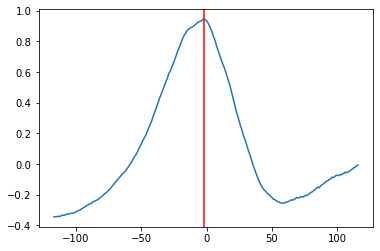

In [5]:
plt.plot(x,y)
plt.axvline(x_max,color='r')

In [6]:
def plot_ccf(counts1, counts2):
    assert len(counts1) == len(counts2)
    N_halfwindow = round(len(counts1)*0.25)
    i_Center =  round(len(counts1)*0.5)
    ccf = np.array([
        [j,*stats.kendalltau(counts1[i_Center-N_halfwindow:i_Center+N_halfwindow], 
                         counts2[i_Center-N_halfwindow+j:i_Center+N_halfwindow+j])] 
                                     for j in np.arange(-N_halfwindow,N_halfwindow)
    ])
    return ccf
z = plot_ccf(counts1, counts2)
x = z[:,0]
y = z[:,1]
p = z[:,2]
x_max = x[np.argmax(y)]
print('lag =',x_max*binwidth,'s')

lag = -0.064 s


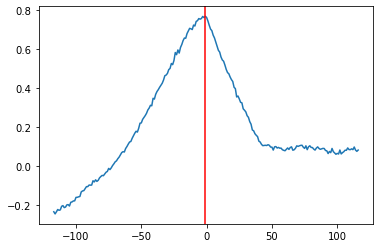

In [7]:
plt.plot(x,y)
plt.axvline(x_max,color='r')

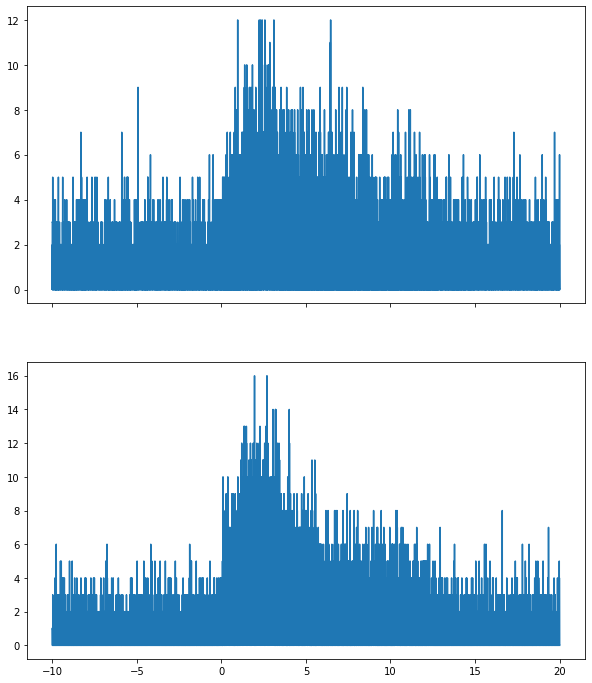

In [3]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from astropy.io import fits
from sklearn.utils import resample
from astropy.stats import bootstrap

bn = '150314205'
det = 'n9'
binwidth = 0.001
viewt1 = -10
viewt2 = 20


databasedir = '/home/lang/Work/myccf/data/'
year = '20'+bn[0:2]
datadir = databasedir+'/'+year+'/bn'+bn
ttefile = glob(datadir+'/'+'glg_tte_'+det+'_bn'+bn+'_v*.fit')
assert len(ttefile) == 1
hdu = fits.open(ttefile[0])
trigtime = hdu['Primary'].header['TRIGTIME']
data = hdu['EVENTS'].data
time = data.field(0)-trigtime
ch = data.field(1)

time1 =  time[(ch >= 20) & (ch <= 40)]
time2 =  time[(ch >= 40) & (ch <= 80)]
tbins = np.arange(viewt1,viewt2+binwidth,binwidth)
counts1, _ = np.histogram(bootstrap(time1,1)[0],bins=tbins)
#counts2, _ = np.histogram(time2,bins=tbins)
counts2, _ = np.histogram(bootstrap(time2,1)[0],bins=tbins)
#train = resample(counts1, n_samples=round(len(counts)/2))
#test = np.array([x for x in values if x.tolist() not in train.tolist()])
counts_forplot1 = np.concatenate(([counts1[0]],counts1))
counts_forplot2 = np.concatenate(([counts2[0]],counts2))

fig, axes = plt.subplots(2,1,figsize=(10, 12),sharex=True,sharey=False)
axes[0].plot(tbins,counts_forplot1,drawstyle='steps')
axes[1].plot(tbins,counts_forplot2,drawstyle='steps')
#plt.savefig('./lc.png')
plt.show()
plt.close()

In [4]:
def plot_ccf(counts1, counts2):
    assert len(counts1) == len(counts2)
    N_halfwindow = round(len(counts1)*0.25)
    i_Center =  round(len(counts1)*0.5)
    ccf = np.array([
        [j,*stats.kendalltau(counts1[i_Center-N_halfwindow:i_Center+N_halfwindow], 
                         counts2[i_Center-N_halfwindow+j:i_Center+N_halfwindow+j])] 
                                     for j in np.arange(-N_halfwindow,N_halfwindow)
    ])
    return ccf
z = plot_ccf(counts1, counts2)
x = z[:,0]
y = z[:,1]
p = z[:,2]
x_max = x[np.argmax(y)]
print('lag =',x_max*binwidth,'s')

lag = -0.171 s


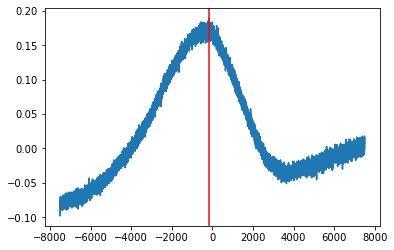

In [5]:
plt.plot(x,y)
plt.axvline(x_max,color='r')

In [11]:
import time
import functools

def timer(func):
    """Print the runtime of the decorated function"""
    @functools.wraps(func)
    def wrapper_timer(*args,**kwargs):
        print(f"Running {func.__name__!r} ...")
        start_time=time.perf_counter()
        value=func(*args,**kwargs)
        end_time=time.perf_counter()
        run_time=end_time-start_time
        print(f"Finished {func.__name__!r} in {run_time:.4f} sec")
        return value
    return wrapper_timer

from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from astropy.io import fits
from sklearn.utils import resample
from astropy.stats import bootstrap 

bn = '150314205'
det = 'n9'


databasedir = '/home/lang/Work/myccf/data/'
year = '20'+bn[0:2]
datadir = databasedir+'/'+year+'/bn'+bn
ttefile = glob(datadir+'/'+'glg_tte_'+det+'_bn'+bn+'_v*.fit')
assert len(ttefile) == 1
hdu = fits.open(ttefile[0])
trigtime = hdu['Primary'].header['TRIGTIME']
data = hdu['EVENTS'].data
t = data.field(0)-trigtime
ch = data.field(1)

t1 =  t[(ch >= 20) & (ch <= 40)]
t2 =  t[(ch >= 40) & (ch <= 80)]


@timer

def bootstrap_ccf(time1, time2, viewt1 = -10, viewt2 = 20.06, binwidth = 0.01,  alpha = 68.27, correlation_method = stats.pearsonr, n_iterations = 100):
    '''
    time1, time2: 1-d TTE data array
    correlation_method = [stats.kendalltau, stats.pearsonr, ]
    stats.norm(0,1).cdf(1)-stats.norm(0,1).cdf(-1) = 0.6827 # 1 sigma
    '''
    # configure bootstrap
    n_iterations = n_iterations
    lags = list()
    tbins = np.arange(viewt1,viewt2+binwidth,binwidth)
    N_bin_total = len(tbins)-1
    N_halfwindow = round(N_bin_total*0.25)
    i_Center =  round(N_bin_total*0.5)
    for i in range(n_iterations):
        counts1, _ = np.histogram(bootstrap(time1,1)[0],bins=tbins)
        counts2, _ = np.histogram(bootstrap(time2,1)[0],bins=tbins)
        # evaluate ccf
        #
        #ccf = np.array([
        #    [j,correlation_method(counts1[i_Center-N_halfwindow:i_Center+N_halfwindow], 
        #                     counts2[i_Center-N_halfwindow+j:i_Center+N_halfwindow+j])[0]] 
        #                                 for j in np.arange(-N_halfwindow,N_halfwindow)
        #])
        ccf = np.array([
            [j-i_Center+N_halfwindow,correlation_method(counts1[i_Center-N_halfwindow:i_Center+N_halfwindow], 
                             counts2[j:2*N_halfwindow+j])[0]] 
                                         for j in np.arange(0,N_bin_total-2*N_halfwindow)
        ])
        x = ccf[:,0]
        y = ccf[:,1]
        x_max = x[np.argmax(y)]
        #print('lag =',x_max*binwidth,'s')
        lags.append(x_max*binwidth)
    # confidence intervals
    alpha = alpha
    ordered = np.sort(lags)
    lower = np.percentile(ordered, (100-alpha)/2)
    upper = np.percentile(ordered, alpha+((100-alpha)/2))
    mean = np.percentile(ordered,50)
    return lower, mean, upper
            
bootstrap_ccf(t1, t2)

Running 'bootstrap_ccf' ...
Finished 'bootstrap_ccf' in 17.5123 sec


(-0.2, -0.13, -0.06)